<a href="https://colab.research.google.com/github/Dbriane208/Python-for-Data-Science/blob/main/Plant_Disease_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Setup**

In [ ]:
# Installing the kaggle library in our notebook
!pip install kaggle

In [ ]:
# Configuring the path of the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Importing Plant Diseases dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.03G/2.04G [00:18<00:00, 132MB/s]
100% 2.04G/2.04G [00:18<00:00, 116MB/s]


In [ ]:
# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/plantvillage-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted successfuly')

The dataset is extracted successfuly


In [ ]:
# Listing all the directories
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


# **Image Preprocessing**

In [ ]:
# Importing the necessary libraries
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Splitting the data into training and validation data:**

In [ ]:
# Base path
base_path = '/content/plantvillage/color'

# Desired image size
image_size = (128,128)

# Batch size for training
batch_size = 32

# seed for reproducibility
seed = 123

# train dataset
train_data, val_data = keras.utils.image_dataset_from_directory(
                                                       base_path,
                                                       image_size=image_size,
                                                       batch_size=batch_size,
                                                       seed = seed,
                                                       validation_split=0.2,
                                                       subset = 'both'
                                                       )

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [ ]:
# Checking for the classes that we have
classes = train_data.class_names[0:5]
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy']

# **Image Visualization**

In [ ]:
# sample images from different categories
Apple_path = os.listdir('/content/plantvillage/color/Apple___Black_rot')
print(Apple_path[0:5])

Peach_path = os.listdir('/content/plantvillage/color/Peach___healthy')
print(Peach_path[0:5])

Corn_path = os.listdir('/content/plantvillage/color/Corn_(maize)___Common_rust_')
print(Corn_path[-5:])

['1a9e869f-62b0-4588-998a-30e0d62bef59___JR_FrgE.S 2876.JPG', 'b371e9c4-177b-4bfb-9430-e14f9f30a06d___JR_FrgE.S 2803.JPG', 'cda4e00f-b32f-4605-b2ca-4b5eba5ecc22___JR_FrgE.S 8799.JPG', 'a59e57c9-a916-447d-95a0-959f1fb51447___JR_FrgE.S 8819.JPG', '988c58b8-9323-4b0f-86de-c4fe396f09b8___JR_FrgE.S 8648.JPG']
['7aca3720-b4c3-4eb8-96a7-44079b3d5171___Rutg._HL 3616.JPG', '25324783-3ee3-4725-a782-cf6e70af3885___Rutg._HL 3702.JPG', 'b7e10988-36af-4eb5-a5dd-b512dbc4ff59___Rutg._HL 2462.JPG', '4f82e4bd-5144-4da9-a725-27be98f75581___Rutg._HL 3698.JPG', '9c24688f-ad46-47d6-a2d4-597c97d57bcd___Rutg._HL 3614.JPG']
['RS_Rust 2453.JPG', 'RS_Rust 2763.JPG', 'RS_Rust 2669.JPG', 'RS_Rust 1991.JPG', 'RS_Rust 2044.JPG']


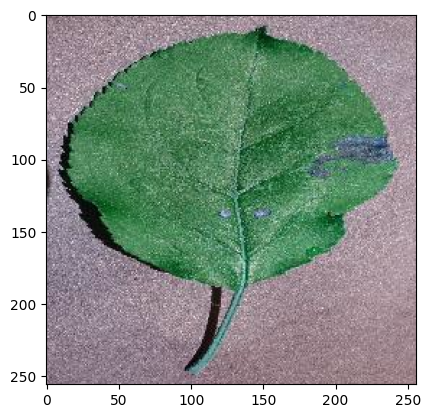

In [ ]:
# Displaying the images
apple = cv2.imread('/content/plantvillage/color/Apple___Black_rot/b371e9c4-177b-4bfb-9430-e14f9f30a06d___JR_FrgE.S 2803.JPG')
imgplot = plt.imshow(apple)
plt.show()

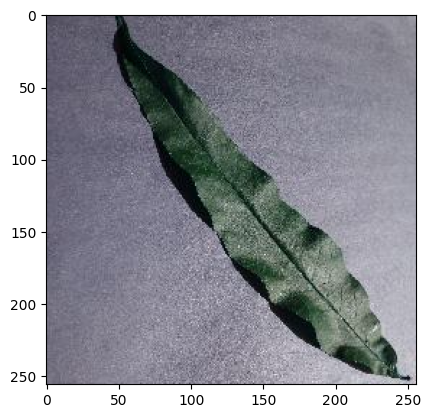

In [ ]:
peach = cv2.imread('/content/plantvillage/color/Peach___healthy/9c24688f-ad46-47d6-a2d4-597c97d57bcd___Rutg._HL 3614.JPG')
image = plt.imshow(peach)
plt.show(image)

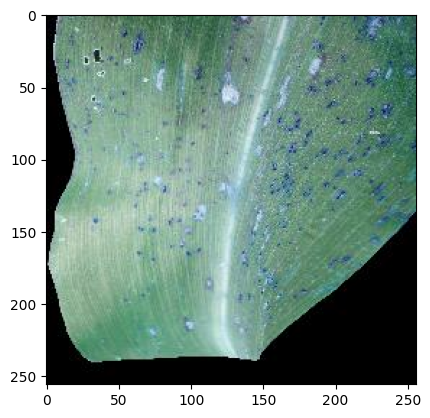

In [ ]:
corn = cv2.imread('/content/plantvillage/color/Corn_(maize)___Common_rust_/RS_Rust 2669.JPG')
image = plt.imshow(corn)
plt.show(image)

#**Building the CNN architecture**

In [ ]:
# Defining the number of classes of plants diseases
number_of_classes = 38

# Defining the model
model = keras.Sequential()

model.add(keras.layers.Rescaling(scale = 1/255,input_shape = (128,128,3)))
model.add(keras.layers.Conv2D(32,kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5)) # prevents overfitting
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes,activation='sigmoid'))

In [ ]:
# compiling the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0

#**Training and Evaluating the Model**

In [ ]:
# train the neural network
history = model.fit(train_data,epochs=50)

Epoch 1/50
1358/1358 [==============================] - 52s 30ms/step - loss: 2.4537 - acc: 0.3453
Epoch 2/50
1358/1358 [==============================] - 44s 32ms/step - loss: 1.6737 - acc: 0.5213
Epoch 3/50
1358/1358 [==============================] - 39s 29ms/step - loss: 1.4023 - acc: 0.5833
Epoch 4/50
1358/1358 [==============================] - 40s 29ms/step - loss: 1.2612 - acc: 0.6176
Epoch 5/50
1358/1358 [==============================] - 40s 29ms/step - loss: 1.1679 - acc: 0.6420
Epoch 6/50
1358/1358 [==============================] - 39s 28ms/step - loss: 1.0849 - acc: 0.6633
Epoch 7/50
1358/1358 [==============================] - 40s 30ms/step - loss: 1.0113 - acc: 0.6862
Epoch 8/50
1358/1358 [==============================] - 37s 27ms/step - loss: 0.9701 - acc: 0.6973
Epoch 9/50
1358/1358 [==============================] - 40s 30ms/step - loss: 0.9222 - acc: 0.7101
Epoch 10/50
1358/1358 [==============================] - 38s 28ms/step - loss: 0.8792 - acc: 0.7229
Epoch 11/

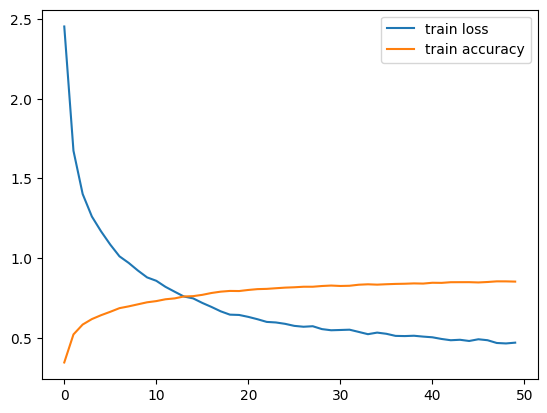

In [ ]:
# Plotting the Evaluation
h = history

# plotting the graph
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['acc'],label ='train accuracy')

plt.legend()
plt.show()

In [ ]:
# Model Evaluation on validation data
model.evaluate(val_data)

340/340 [==============================] - 14s 41ms/step - loss: 0.5719 - acc: 0.8710


[0.5719238519668579, 0.8710063695907593]

#**Testing Our Model**

In [ ]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image